In [ ]:
path = 'resources/Language Detection.csv'

In [ ]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import bz2
import pickle
import _pickle as cPickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn import pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from nltk.stem import PorterStemmer
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,log_loss,cohen_kappa_score,plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import tensorflow as tf
import keras
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(path)
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
df = pd.read_csv(path)
type(df[df['Language'] == 'Tamil'].iloc[0][0])

str

In [ ]:
X = df.iloc[:,0]
y = df.iloc[:,1]
print(np.unique(y))

le = LabelEncoder()
y = le.fit_transform(y)

['Arabic' 'Danish' 'Dutch' 'English' 'French' 'German' 'Greek' 'Hindi'
 'Italian' 'Kannada' 'Malayalam' 'Portugeese' 'Russian' 'Spanish'
 'Sweedish' 'Tamil' 'Turkish']


## Preprocessing

In [ ]:
def preprocess(X,y = df['Language']):
    data_list = []
    i=0
    for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)      # removing the symbols and numbers
        text = re.sub(r'[[]]', ' ', text)

        text = text.lower()
        data_list.append(text)
    return data_list

d_preprocessed = preprocess(X)

In [ ]:
#find index of tamil text
def find_tamil(X,y):
    tamil_index = []
    for i in range(len(X)):
        if y[i] == 'Tamil':
            tamil_index.append(i)
    return tamil_index
d_preprocessed[find_tamil(X,df['Language'])[0]]

'விக்கிப்பீடியா  wikipedia  /ˌwɪkɪˈpiːdiə/  கேட்க  wik-ih-pee-dee-ə அல்லது /ˌwɪkiˈpiːdiə/  கேட்க  wik-ee-pee-dee-ə  என்பது  வணிக நோக்கற்ற விக்கிமீடியா நிறுவனத்தின் உதவியுடன் நடத்தப்படும்  கூட்டாகத் தொகுக்கப்படும்  பன்மொழி  கட்டற்ற இணையக் கலைக்களஞ்சியமாகும்.'

## Exploratory Data Analysis

<AxesSubplot:xlabel='count', ylabel='Language'>

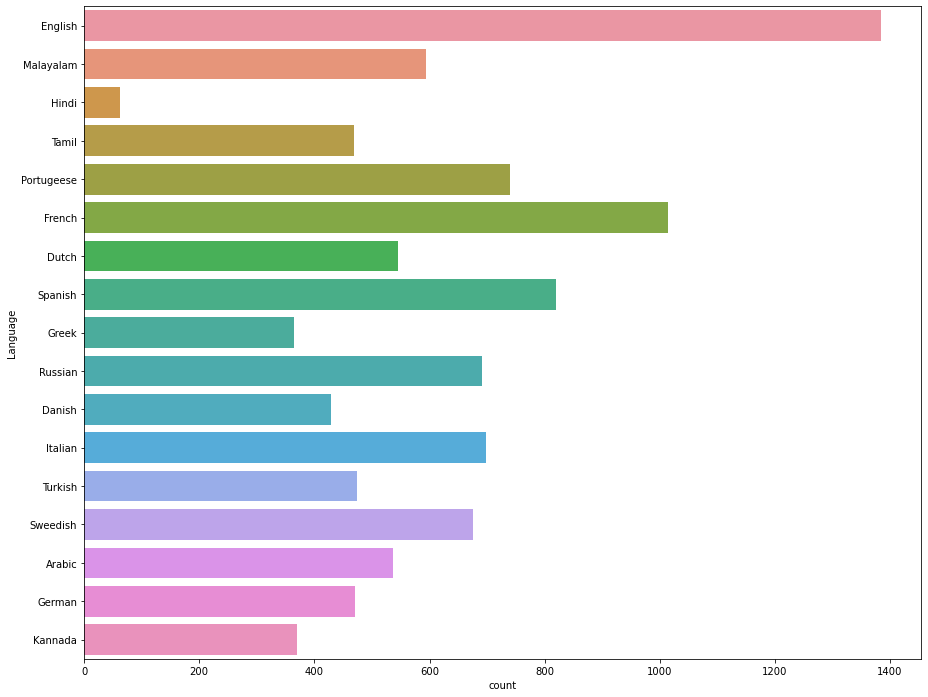

In [ ]:
X_df  = pd.DataFrame(preprocess(X))
X_df.columns = ['Text']
X_df['Language'] = df['Language']
plt.figure(figsize=(15,12))
sns.countplot(y = df['Language'], data=df)

Text(0.5, 1.0, 'Number of Words per Text')

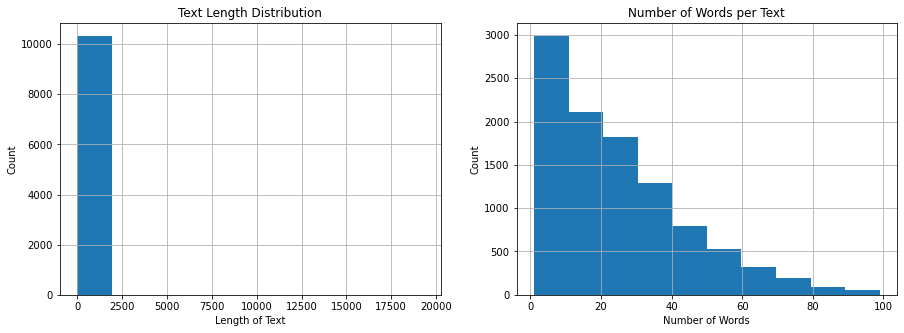

In [ ]:
#length count
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
X_df['Text'].str.len().hist()
plt.xlabel('Length of Text')
plt.ylabel('Count')
plt.title('Text Length Distribution')

#number of words per text
plt.subplot(1,2,2)
word_count =X_df['Text'].apply(lambda x: len(x.split(' ')))
X_df['Word Count'] = word_count
X_df_lower = X_df[X_df['Word Count']<100]
X_df_lower['Word Count'].hist()
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Number of Words per Text')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\susim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


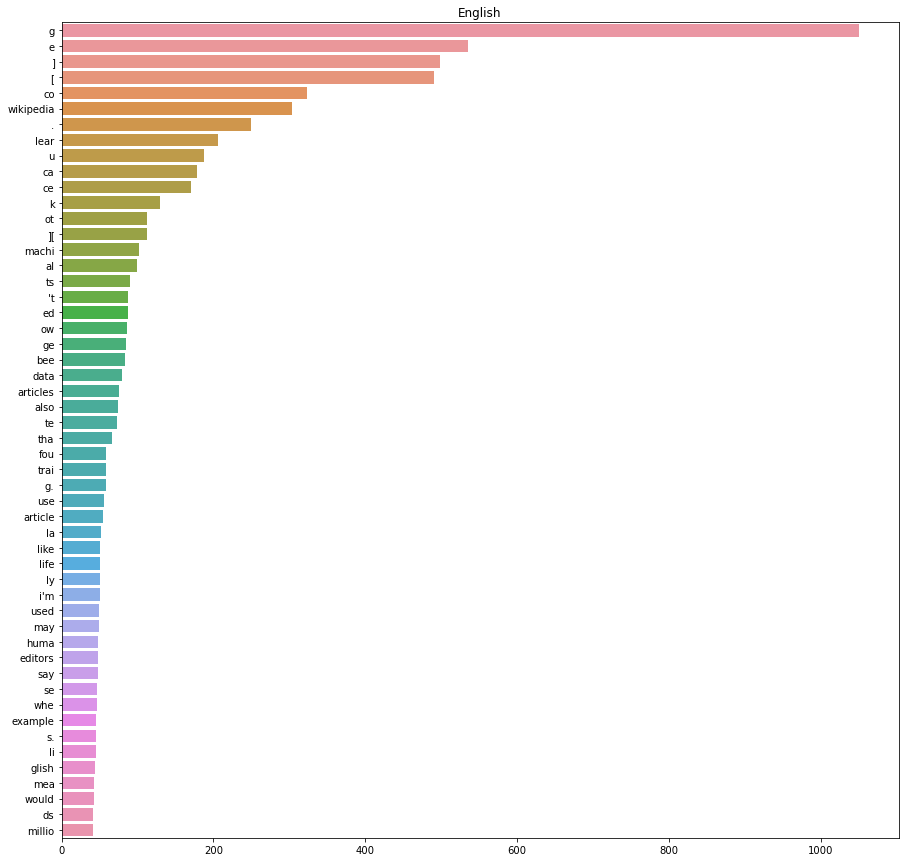

In [ ]:
from collections import  Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def plot_most_occuring_words(text,language):
    stop=set(stopwords.words('english'))
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:100]:
        if word not in stop:
            x.append(word)
            y.append(count)
    plt.figure(figsize=(15,15))
    sns.barplot(x=y,y=x)
    plt.title(language)
df_eng = X_df[X_df['Language']=='English']
plot_most_occuring_words(df_eng['Text'],'English')

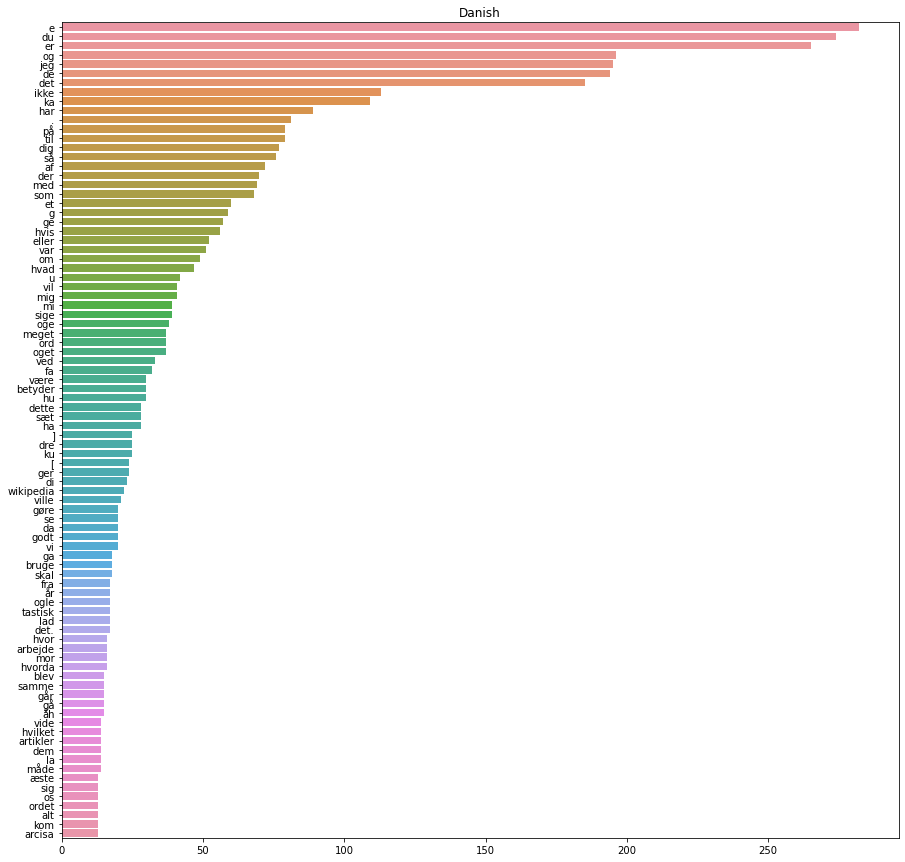

In [ ]:
df_danish = X_df[X_df['Language']=='Danish']
plot_most_occuring_words(df_danish['Text'],'Danish')

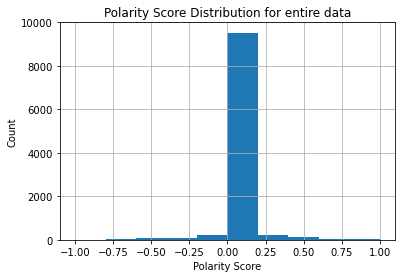

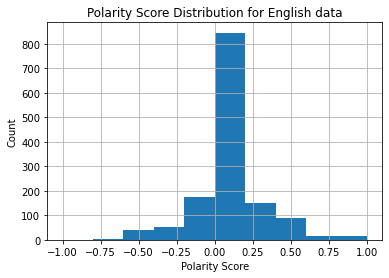

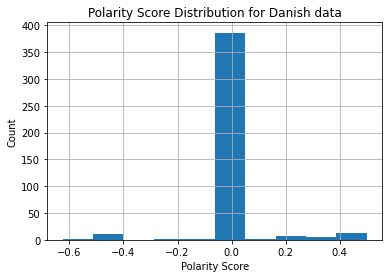

In [ ]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

X_df['polarity_score']=X_df['Text'].\
   apply(lambda x : polarity(x))
X_df['polarity_score'].hist()
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.title('Polarity Score Distribution for entire data')
plt.show()
x_df_eng = X_df[X_df['Language']=='English']
x_df_eng['polarity_score'].hist()
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.title('Polarity Score Distribution for English data')
plt.show()
x_df_danish = X_df[X_df['Language']=='Danish']
x_df_danish['polarity_score'].hist()
plt.xlabel('Polarity Score')
plt.ylabel('Count')
plt.title('Polarity Score Distribution for Danish data')
plt.show()

## Different Vectorization techniques

### TF-IDF

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(3,5),analyzer='char')
X_new1 = tfidf.fit_transform(preprocess(X))
joblib.dump(tfidf, "resources/tfidf.pkl")
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_new1, y, test_size = 0.20)

In [ ]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

x_train_tensor1 = convert_sparse_matrix_to_sparse_tensor(x_train1)
x_test_tensor1 = convert_sparse_matrix_to_sparse_tensor(x_test1)


### Count Vectorizer

In [ ]:
cv = CountVectorizer()
X_new2 = cv.fit_transform(preprocess(X)).toarray()
joblib.dump(cv, "resources/cv.pkl")
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_new2, y, test_size = 0.20)

In [ ]:
def save_file(filename, model):
    with bz2.BZ2File(filename, 'wb') as f:
        cPickle.dump(model, f)

## Implementing Models

### Multinomial Naive Bayes

In [ ]:
#Using TF-IDF Vectorzier
model1 = MultinomialNB()
model1.fit(x_train1, y_train1)
y_pred = model1.predict(x_test1)
ac1 = accuracy_score(y_test1, y_pred)
loss = log_loss(y_test1,model1.predict_proba(x_test1))
f1 = f1_score(y_test1,y_pred, average='macro')
print("The accuracy using Multinomial NB and TF-IDF Vectorizer is: ",ac1*100,"%")
print("The log loss using Multinomial NB and TF-IDF Vectorizer is: ",loss*100,"%")
print("The f1 score using Multinomial NB and TF-IDF Vectorizer is: ",f1*100,"%")
#Using Count Vectorizer
model2 = MultinomialNB()
model2.fit(x_train2, y_train2)
y_pred = model2.predict(x_test2)
ac1 = accuracy_score(y_test2, y_pred)
loss = log_loss(y_test2,model2.predict_proba(x_test2))
f1 = f1_score(y_test2,y_pred, average='macro')
print("The accuracy using Multinomial NB and Count Vectorizer is: ",ac1*100,"%")
print("The log loss using Multinomial NB and Count Vectorizer is: ",loss*100,"%")
print("The f1 score using Multinomial NB and Count Vectorizer is: ",f1*100,"%")
save_file('resources/MultinomialNB.pkl.bz2',model2)

The accuracy using Multinomial NB and TF-IDF Vectorizer is:  95.40618955512572 %
The log loss using Multinomial NB and TF-IDF Vectorizer is:  26.865841009662926 %
The f1 score using Multinomial NB and TF-IDF Vectorizer is:  95.47712856635499 %
The accuracy using Multinomial NB and Count Vectorizer is:  97.43713733075435 %
The log loss using Multinomial NB and Count Vectorizer is:  11.259278537868449 %
The f1 score using Multinomial NB and Count Vectorizer is:  97.7645330449328 %


### MLP

In [ ]:
#Model for TF-IDF
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=256,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=128,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=64,activation='tanh'))
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
ann.add(tf.keras.layers.Dense(units=17,activation='softmax'))
ann.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
x_train_mlp1 = tf.sparse.reorder(x_train_tensor1)
ann.fit(x_train_mlp1,y_train1, epochs=5, batch_size=32)

Epoch 1/5
259/259 [==============================] - 108s 408ms/step - loss: 0.5484 - accuracy: 0.8505
Epoch 2/5
259/259 [==============================] - 107s 412ms/step - loss: 0.0741 - accuracy: 0.9832
Epoch 3/5
259/259 [==============================] - 109s 422ms/step - loss: 0.0288 - accuracy: 0.9943
Epoch 4/5
259/259 [==============================] - 111s 428ms/step - loss: 0.0149 - accuracy: 0.9981
Epoch 5/5
259/259 [==============================] - 111s 430ms/step - loss: 0.0097 - accuracy: 0.9989


In [ ]:
#Model for Count Vectorizer
ann2 = tf.keras.models.Sequential()
ann2.add(tf.keras.layers.Dense(units=128,activation='tanh'))
ann2.add(tf.keras.layers.Dense(units=256,activation='tanh'))
ann2.add(tf.keras.layers.Dense(units=128,activation='tanh'))
ann2.add(tf.keras.layers.Dense(units=64,activation='tanh'))
ann2.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann2.add(tf.keras.layers.Dropout(0.2))
ann2.add(tf.keras.layers.Dense(units=17,activation='softmax'))

In [ ]:
ann2.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
ann2.fit(x_train2,y_train2, epochs=10, batch_size=64)

Epoch 1/10
130/130 [==============================] - 4s 27ms/step - loss: 0.7851 - accuracy: 0.8208
Epoch 2/10
130/130 [==============================] - 3s 25ms/step - loss: 0.0928 - accuracy: 0.9833
Epoch 3/10
130/130 [==============================] - 3s 25ms/step - loss: 0.0341 - accuracy: 0.9950
Epoch 4/10
130/130 [==============================] - 3s 26ms/step - loss: 0.0221 - accuracy: 0.9967
Epoch 5/10
130/130 [==============================] - 3s 26ms/step - loss: 0.0193 - accuracy: 0.9964
Epoch 6/10
130/130 [==============================] - 3s 25ms/step - loss: 0.0164 - accuracy: 0.9971
Epoch 7/10
130/130 [==============================] - 3s 25ms/step - loss: 0.0147 - accuracy: 0.9967
Epoch 8/10
130/130 [==============================] - 3s 25ms/step - loss: 0.0168 - accuracy: 0.9971
Epoch 9/10
130/130 [==============================] - 3s 25ms/step - loss: 0.0143 - accuracy: 0.9969
Epoch 10/10
130/130 [==============================] - 3s 25ms/step - loss: 0.0150 - accura

In [ ]:
x_test_mlp1 = tf.sparse.reorder(x_test_tensor1)
print("Using TF-IDF and NN we get accuracy as: ",accuracy_score(y_test1, np.argmax(ann.predict(x_test_mlp1), axis=1))*100,"%")
print("Using TF-IDF and NN we get F1-score as: ",f1_score(y_test1, np.argmax(ann.predict(x_test_mlp1), axis=1), average='macro')*100,"%")
print("Using TF-IDF and NN we get log loss as: ",log_loss(y_test1,ann.predict(x_test_mlp1))*100,"%")
print("Using Count Vectorizer and NN we get accuracy as: ",accuracy_score(y_test2, np.argmax(ann2.predict(x_test2), axis=-1))*100,"%")
print("Using Count Vectorizer and NN we get F1-score as: ",f1_score(y_test2, np.argmax(ann2.predict(x_test2), axis=1), average='macro')*100,"%")
print("Using Count Vectorizer and NN we get log loss as: ",log_loss(y_test2,ann2.predict(x_test2))*100,"%")
#Since we see that using Count vectorizer with NN gives a better accuracy, we are storing only this model
ann.save('resources/ann.h5')
print("Cohen Kappa score of Neural Network using TF-IDF is: ",cohen_kappa_score(y_test1,np.argmax(ann.predict(x_test_mlp1), axis=1))*100,"%")
print("Cohen Kappa score of Neural Network using CV is: ",cohen_kappa_score(y_test2,np.argmax(ann2.predict(x_test2), axis=1))*100,"%")

Using TF-IDF and NN we get accuracy as:  98.45261121856866 %
Using TF-IDF and NN we get F1-score as:  98.55555944249997 %
Using TF-IDF and NN we get log loss as:  8.6680401432363 %
Using Count Vectorizer and NN we get accuracy as:  95.6963249516441 %
Using Count Vectorizer and NN we get F1-score as:  95.64033293355574 %
Using Count Vectorizer and NN we get log loss as:  22.69038005500277 %
Cohen Kappa score of Neural Network using TF-IDF is:  98.33433007730304 %
Cohen Kappa score of Neural Network using CV is:  95.37079515318338 %


### Logistic Regression

In [ ]:
lr_clf_tfidf = LogisticRegression()
lr_clf_tfidf.fit(x_train1,y_train1)
y_pred_lr_tfidf = lr_clf_tfidf.predict(x_test1)

In [ ]:
lr_clf_cv = LogisticRegression()
lr_clf_cv.fit(x_train2,y_train2)
y_pred_lr_cv = lr_clf_cv.predict(x_test2)

In [ ]:
print("Accuray of logistic regression using CV is",(accuracy_score(y_pred_lr_cv,y_test2))*100 ,"%")
print("Accuray of logistic regression using TF-IDF is",accuracy_score(y_pred_lr_tfidf,y_test1)*100,"%")
print("F1 score of logistic regression using CV is",f1_score(y_pred_lr_cv,y_test2,average='macro')*100,"%")
print("F1 score of logistic regression using TF-IDF is",f1_score(y_pred_lr_tfidf,y_test1,average='macro')*100,"%")
print("Log loss of logistic regression using CV is",log_loss(y_test2,lr_clf_cv.predict_proba(x_test2))*100,"%")
print("Log loss of logistic regression using TF-IDF is",log_loss(y_test1,lr_clf_tfidf.predict_proba(x_test1))*100,"%")

Accuray of logistic regression using CV is 94.63249516441006 %
Accuray of logistic regression using TF-IDF is 98.16247582205028 %
F1 score of logistic regression using CV is 94.28282198487089 %
F1 score of logistic regression using TF-IDF is 97.77499932305425 %
Log loss of logistic regression using CV is 30.44844440798417 %
Log loss of logistic regression using TF-IDF is 54.88100248160958 %


In [ ]:
save_file('resources/lr.pkl.bz2',lr_clf_tfidf)

### Stacking Classifier

In [ ]:
lgb1=lgb.LGBMClassifier()
estimators = [
    ('lgb',lgb1),
    ('svm',LinearSVC())                    
 ]
clf1 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
#Using TF-IDF Vectorizer
clf1.fit(x_train1, y_train1)
plist3=clf1.predict(x_test1)
acc3=accuracy_score(plist3,y_test1)  
f1 = f1_score(y_test1,plist3,average='macro')
loss = log_loss(y_test1,clf1.predict_proba(x_test1))
print("Stacking Classifier with TF-IDF vectorizer gives accuracy: ", acc3*100,"%")
print("Stacking Classifier with TF-IDF vectorizer gives log loss: ", loss*100,"%")
print("Stacking Classifier with TF-IDF vectorizer gives f1 score: ", f1*100,"%")
#Using Count Vectorizer
clf2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf2.fit(x_train2, y_train2)
plist3=clf2.predict(x_test2)
acc3=accuracy_score(plist3,y_test2)  
f1 = f1_score(y_test2,plist3,average='macro')
loss = log_loss(y_test2,clf2.predict_proba(x_test2))
print("Stacking Classifier with Count vectorizer gives accuracy: ", acc3*100,"%")
print("Stacking Classifier with Count vectorizer gives log loss: ", loss*100,"%")
print("Stacking Classifier with Count vectorizer gives f1 score: ", f1,"%")
save_file('resources/lang_stack.pkl.bz2',clf1)

Stacking Classifier with TF-IDF vectorizer gives accuracy:  98.54932301740811 %
Stacking Classifier with TF-IDF vectorizer gives log loss:  7.03079787211624 %
Stacking Classifier with TF-IDF vectorizer gives f1 score:  98.58580408423325 %
Stacking Classifier with Count vectorizer gives accuracy:  95.2127659574468 %
Stacking Classifier with Count vectorizer gives log loss:  16.96017750851526 %
Stacking Classifier with Count vectorizer gives f1 score:  0.9534918976217348 %


### CNN

In [ ]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv1D(filters=128, kernel_size=1,padding='same' ,activation='relu', input_shape=[x_train2.shape[1],1]))
cnn.add(tf.keras.layers.MaxPooling1D(pool_size=3))
cnn.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling1D(pool_size=3))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=17, activation='softmax'))
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 34937, 128)        256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11645, 128)       0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 11643, 64)         24640     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 3881, 64)         0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 248384)            0         
                                                                 
 dense_44 (Dense)            (None, 32)               

In [ ]:
cnn.fit(x_train2, y_train2, epochs = 10,batch_size = 32)
cnn.save('resources/lang_cnn.h5')

Epoch 1/10
259/259 [==============================] - 66s 214ms/step - loss: 0.3392 - accuracy: 0.9185
Epoch 2/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0421 - accuracy: 0.9891
Epoch 3/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0168 - accuracy: 0.9960
Epoch 4/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0133 - accuracy: 0.9964
Epoch 5/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0207 - accuracy: 0.9947
Epoch 6/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0228 - accuracy: 0.9943
Epoch 7/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0124 - accuracy: 0.9969
Epoch 8/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0117 - accuracy: 0.9969
Epoch 9/10
259/259 [==============================] - 55s 212ms/step - loss: 0.0126 - accuracy: 0.9973
Epoch 10/10
259/259 [==============================] - 55s 211ms/step - l

In [ ]:
y_pred_cnn = cnn.predict(x_test2)
pred = []
for i in range(len(y_pred_cnn)):
  pred.append(np.argmax(y_pred_cnn[i]))
print("Accuracy obtained using CNNs with Count Vectorizer is: ",accuracy_score(y_test2,pred)*100,"%")
print("F1-score using CNNs with Count Vectorizer is: ",f1_score(y_test2, np.argmax(ann2.predict(x_test2), axis=1), average='macro')*100,"%")
print("Log loss using CNNs with Count Vectorizer is: ",log_loss(y_pred,ann2.predict(x_test2))*100,"%")

## Evaluation metrics

In [ ]:
def load_file(filename): 
    with bz2.BZ2File(filename, 'rb') as f:
        return cPickle.load(f)

### Evaluating Multinomial NB

Accuracy of MultinomialNB is:  97.43713733075435 %
F1 score of MultinomialNB is:  97.7645330449328 %
The log loss using Multinomial NB and Count Vectorizer is:  11.259278537868449 %
Cohen Kappa score of MultinomialNB is:  97.23895262381875 %


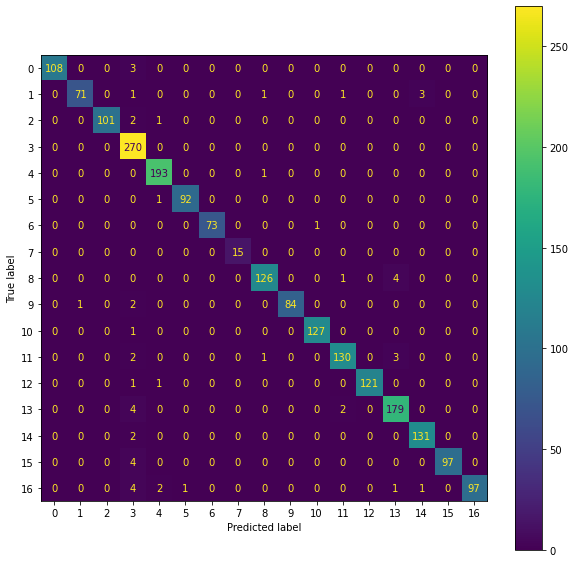

In [ ]:
#import roc auc score
model = load_file('resources/MultinomialNB.pkl.bz2')
y_pred_mnb = model.predict(x_test2)
acc = accuracy_score(y_test2,y_pred_mnb)
loss = log_loss(y_test2,model.predict_proba(x_test2))
print("Accuracy of MultinomialNB is: ",acc*100,"%")
print("F1 score of MultinomialNB is: ",f1_score(y_test2,y_pred_mnb,average='macro')*100,"%")
print("The log loss using Multinomial NB and Count Vectorizer is: ",loss*100,"%")
print("Cohen Kappa score of MultinomialNB is: ",cohen_kappa_score(y_test2,y_pred_mnb)*100,"%")

#increase size of the plot
fig,ax = plt.subplots(figsize=(10,10))
ax = plot_confusion_matrix(model,x_test2,y_test2,ax=ax)

### Evaluating Stacking Classifier

Accuracy of stacking classifier is:  98.54932301740811 %
F1 score of stacking classifier is:  98.58580408423325 %
Log loss of stacking classifier is:  7.03079787211624 %
Cohen Kappa score of stacking classifier is:  98.43815139962177 %


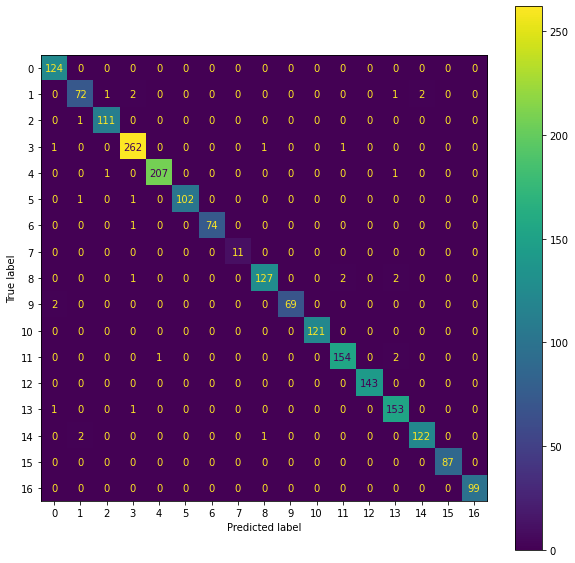

In [ ]:
model = load_file('resources/lang_stack.pkl.bz2')
y_pred_stack = model.predict(x_test1)
acc = accuracy_score(y_test1,y_pred_stack)
loss = log_loss(y_test1,model.predict_proba(x_test1))
print("Accuracy of stacking classifier is: ",acc*100,"%")
print("F1 score of stacking classifier is: ",f1_score(y_test1,y_pred_stack,average='macro')*100,"%")
print("Log loss of stacking classifier is: ",loss*100,"%")
print("Cohen Kappa score of stacking classifier is: ",cohen_kappa_score(y_test1,y_pred_stack)*100,"%")
fig,ax = plt.subplots(figsize=(10,10))
ax = plot_confusion_matrix(model,x_test1,y_test1,ax=ax)

### Evaluating Logistic Regression

Accuracy of logistic regression is:  98.16247582205028 %
F1 score of logistic regression is:  97.77499932305425 %
Log loss of logistic regression is:  54.88100248160958 %
Cohen Kappa score of logistic regression is:  98.02075756446189 %


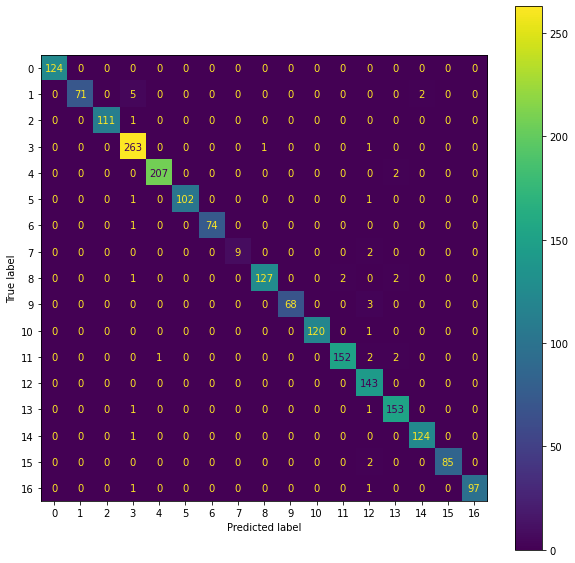

In [ ]:
model = load_file('resources/lr.pkl.bz2')
y_pred_lr = model.predict(x_test1)
acc = accuracy_score(y_test1,y_pred_lr)
loss = log_loss(y_test1,model.predict_proba(x_test1))
print("Accuracy of logistic regression is: ",acc*100,"%")
print("F1 score of logistic regression is: ",f1_score(y_test1,y_pred_lr,average='macro')*100,"%")
print("Log loss of logistic regression is: ",loss*100,"%")
print("Cohen Kappa score of logistic regression is: ",cohen_kappa_score(y_test1,y_pred_lr)*100,"%")
fig,ax = plt.subplots(figsize=(10,10))
ax = plot_confusion_matrix(model,x_test1,y_test1,ax=ax)

### Evaluating MLP

Using TF-IDF and NN we get accuracy as:  98.45261121856866 %
Using TF-IDF and NN we get F1-score as:  98.55555944249997 %
Using TF-IDF and NN we get log loss as:  8.6680401432363 %
Cohen Kappa score of Neural Network using TF-IDF is:  98.33433007730304 %


<AxesSubplot:>

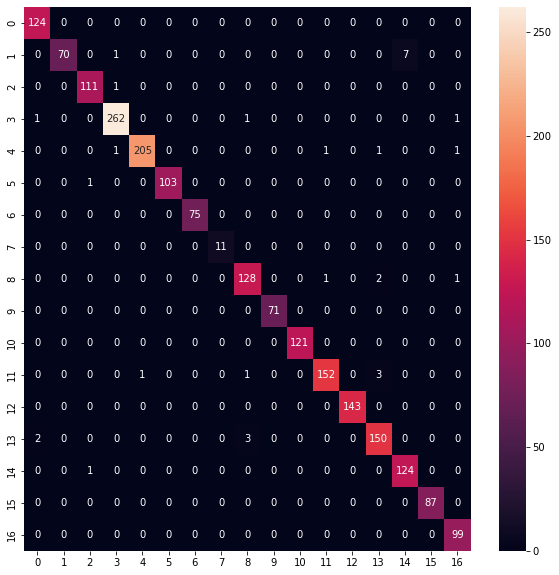

In [ ]:
model = keras.models.load_model('resources/ann.h5')
print("Using TF-IDF and NN we get accuracy as: ",accuracy_score(y_test1, np.argmax(model.predict(x_test_mlp1), axis=1))*100,"%")
print("Using TF-IDF and NN we get F1-score as: ",f1_score(y_test1, np.argmax(model.predict(x_test_mlp1), axis=1), average='macro')*100,"%")
print("Using TF-IDF and NN we get log loss as: ",log_loss(y_test1,model.predict(x_test_mlp1))*100,"%")
print("Cohen Kappa score of Neural Network using TF-IDF is: ",cohen_kappa_score(y_test1,np.argmax(model.predict(x_test_mlp1), axis=1))*100,"%")
fig,ax = plt.subplots(figsize=(10,10))
res = tf.math.confusion_matrix(y_test1,np.argmax(model.predict(x_test_mlp1), axis=1))
sns.heatmap(res,fmt="d",annot=True)

### Evaluating CNN

Using TF-IDF and NN we get accuracy as:  98.8394584139265 %
Using TF-IDF and NN we get F1-score as:  98.96585694313286 %
Using TF-IDF and NN we get log loss as:  5.119566595735995 %
Cohen Kappa score of Neural Network using TF-IDF is:  98.75118950508033 %


<AxesSubplot:>

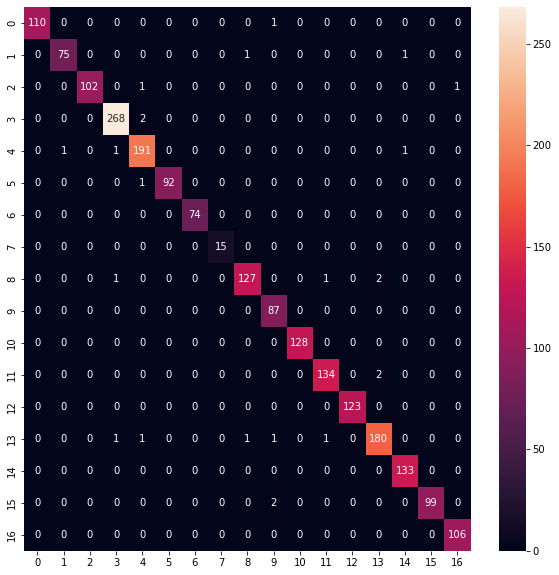

In [ ]:
model = keras.models.load_model('resources/lang_cnn.h5')
print("Using TF-IDF and CNN we get accuracy as: ",accuracy_score(y_test2, np.argmax(model.predict(x_test2), axis=1))*100,"%")
print("Using TF-IDF and CNN we get F1-score as: ",f1_score(y_test2, np.argmax(model.predict(x_test2), axis=1), average='macro')*100,"%")
print("Using TF-IDF and CNN we get log loss as: ",log_loss(y_test2,model.predict(x_test2))*100,"%")
print("Cohen Kappa score of CNN using TF-IDF is: ",cohen_kappa_score(y_test2,np.argmax(model.predict(x_test2), axis=1))*100,"%")
fig,ax = plt.subplots(figsize=(10,10))
res = tf.math.confusion_matrix(y_test2,np.argmax(model.predict(x_test2), axis=1))
sns.heatmap(res,fmt="d",annot=True)

## Pipeline

In [ ]:
class Pipeline:
    def __init__(self,dataset,random_state):
        self.dataset=dataset
        self.random_state=random_state
        self.count_vectorizer = False
    def preprocess_data(self):
        self.X = self.dataset.iloc[:,0]
        self.y = self.dataset.iloc[:,1]
        le = LabelEncoder()
        self.y = le.fit_transform(self.y)
        tfidf = joblib.load('resources/tfidf.pkl')
        self.X_new1 = tfidf.transform(preprocess(self.X))
        self.x_train1, self.x_test1, self.y_train1, self.y_test1 = train_test_split(self.X_new1, self.y, test_size = 0.20)
        self.x_train_tensor = convert_sparse_matrix_to_sparse_tensor(self.x_train1)
        self.x_test_tensor = convert_sparse_matrix_to_sparse_tensor(self.x_test1)
        cv = joblib.load('resources/cv.pkl')
        self.X_new2 = cv.transform(preprocess(self.X)).toarray()
        self.x_train2, self.x_test2, self.y_train2, self.y_test2 = train_test_split(self.X_new2, self.y, test_size = 0.20)
    
    def use_model(self,model_name):
        if model_name=='ann':
            self.ann = keras.models.load_model('resources/ann.h5')
            self.x_test1 = tf.sparse.reorder(self.x_test_tensor)
            self.y_pred = np.argmax(self.ann.predict(self.x_test1),axis=1)
        elif model_name=='stack':
            self.stack = load_file('resources/lang_stack.pkl.bz2')
            self.y_pred = self.stack.predict(self.x_test1)
        elif model_name == 'NB':
            self.naive = load_file('resources/MultinomialNB.pkl.bz2')
            self.y_pred = self.naive.predict(self.x_test2)
            self.count_vectorizer = True
        
    def get_metrics(self):
        if(self.count_vectorizer):
            print("Accuracy: ",accuracy_score(self.y_test2, self.y_pred)*100,"%")
            print("F1-score: ",f1_score(self.y_test2, self.y_pred, average='macro')*100,"%")
            print("Confusion Matrix: \n",confusion_matrix(self.y_test2, self.y_pred))
            print("Classification Report: \n",classification_report(self.y_test2, self.y_pred))
        else:
            print("Accuracy: ",accuracy_score(self.y_test1, self.y_pred)*100,"%")
            print("F1-score: ",f1_score(self.y_test1, self.y_pred, average='macro')*100,"%")
            print("Confusion Matrix: \n",confusion_matrix(self.y_test1, self.y_pred))
            print("Classification Report: \n",classification_report(self.y_test1, self.y_pred))
    def run_pipeline(self,model):
        print("preprocessing data 🔃")
        self.preprocess_data()
        print("preprocessing done ✅")
        print("model is running 🔃")
        self.use_model(model)
        print("running model done ✅")
        print("getting metrics 🔃")
        self.get_metrics()
        

In [ ]:
pip = Pipeline(df,random_state=0)
pip.run_pipeline(model = "ann") # Here model is the user inputted model

preprocessing data 🔃
preprocessing done ✅
model is running 🔃
running model done ✅
getting metrics 🔃
Accuracy:  99.75822050290135 %
F1-score:  99.76419259107999 %
Confusion Matrix: 
 [[116   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  81   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0 110   1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 277   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 210   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0  87   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  75   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 149   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  74   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 114   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0